<a href="https://colab.research.google.com/github/DROP5136/DROP5136/blob/main/lab_file_est_102303743.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EST LAB_FILE

WAP to sharpen the input image using:

Laplacian filter

Gradient operators of Sobel and Canny edge detector

Unsharp masking.
To obtain blurred image, use the Gaussian filter of size 5×5 and sigma = 3.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("image.jpg")
print("Original Image:")
cv2_imshow(image)

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# LAPLACIAN EDGE DETECTION

lap = cv2.Laplacian(gray_img, ddepth=cv2.CV_64F)
lap = cv2.convertScaleAbs(lap)
print("\n✨ Laplacian Result:")
cv2_imshow(lap)

#SOBEL EDGE DETECTION (X + Y directions)

sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)


sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)


sobel_output = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5,
                               cv2.convertScaleAbs(sobel_y), 0.5, 0)

print("\n✨ Sobel Combined Output:")
cv2_imshow(sobel_output)

# 3️⃣  CANNY EDGE DETECTOR

canny = cv2.Canny(gray_img, 100, 200)
print("\n✨ Canny Edges:")
cv2_imshow(canny)

# 4️⃣  UNSHARP MASKING (Sharpening Technique)

blur_img = cv2.GaussianBlur(image, (5, 5), sigmaX=3)
print("\n✨ Blurred Image (used for masking):")
cv2_imshow(blur_img)

detail_boost = cv2.subtract(image, blur_img)


unsharp_img = cv2.addWeighted(image, 1.5, blur_img, -0.5, 0)

print("\n✨ Final Sharpened Image (Unsharp Masking):")
cv2_imshow(unsharp_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


ques WAP to generate following noises using equations derived from PDFs of noise distributions.
Compare your output with those generated using inbuilt function imnoise.
Plot the histograms of generated noise to determine the shape of the distribution.

Uniform noise

Gaussian noise

Erlang noise

Exponential noise

Rayleigh noise

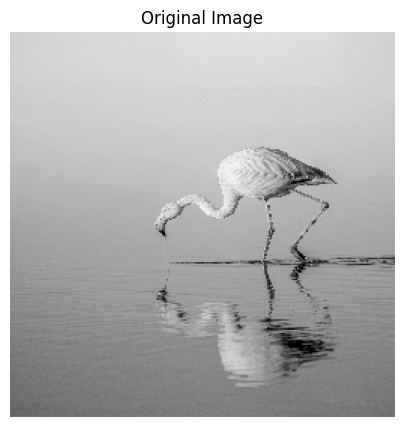

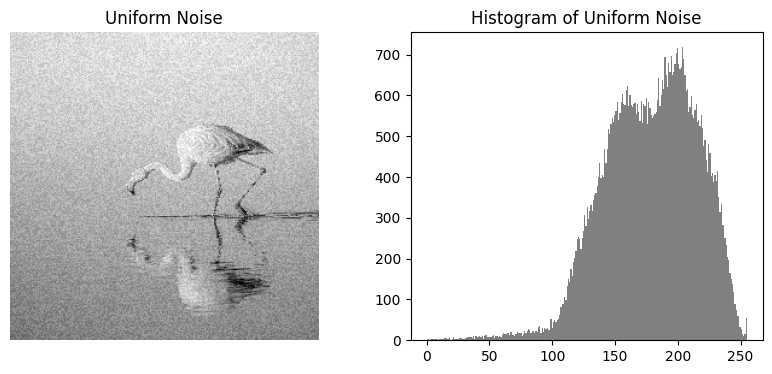

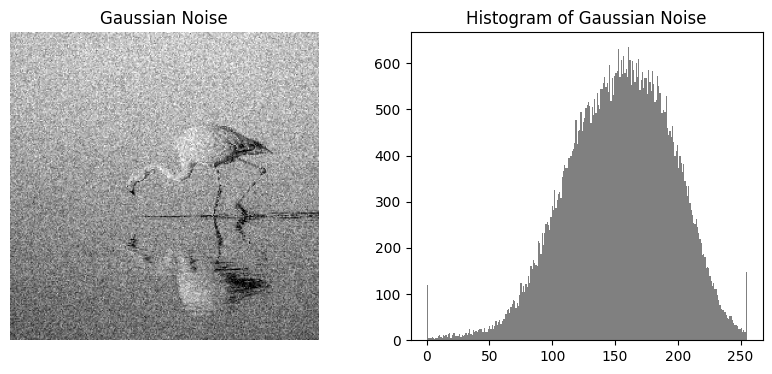

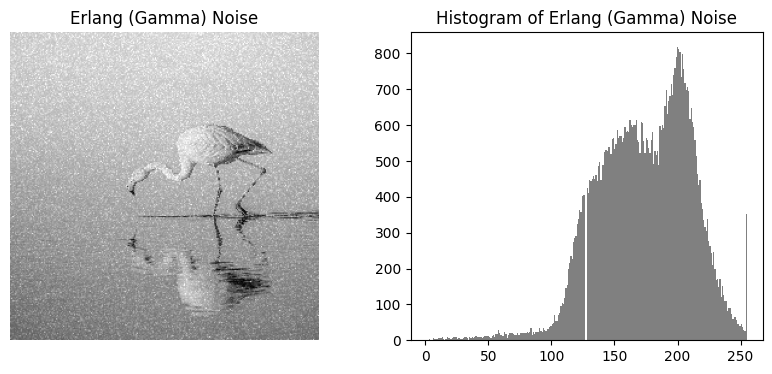

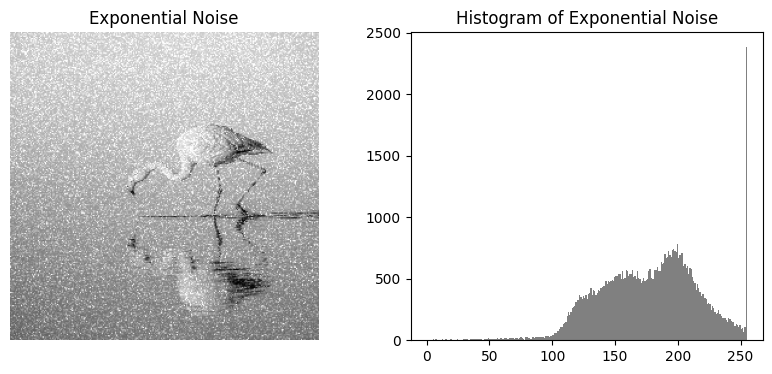

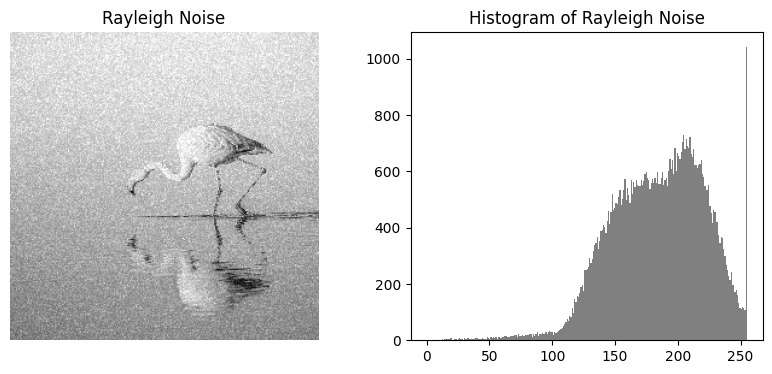

All noise types generated successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = "image.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (256, 256))

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

def show_noise(noisy_img, title):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(noisy_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(noisy_img.ravel(), bins=256, color='gray')
    plt.title(f"Histogram of {title}")

    plt.show()
# UNIFORM NOISE

uniform_noise = np.random.uniform(0, 50, img.shape)
noisy_uniform = cv2.add(img, uniform_noise.astype(np.uint8))
show_noise(noisy_uniform, "Uniform Noise")

# GAUSSIAN NOISE

mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, img.shape)
noisy_gaussian = img + gaussian_noise
noisy_gaussian = np.clip(noisy_gaussian, 0, 255).astype(np.uint8)
show_noise(noisy_gaussian, "Gaussian Noise")

# GAMMA NOISE

k = 2.0
theta = 10.0
erlang_noise = np.random.gamma(k, theta, img.shape)
noisy_erlang = img + erlang_noise
noisy_erlang = np.clip(noisy_erlang, 0, 255).astype(np.uint8)
show_noise(noisy_erlang, "Erlang (Gamma) Noise")
# EXPONENTIAL NOISE

lam = 1/25
exp_noise = np.random.exponential(1/lam, img.shape)
noisy_exp = img + exp_noise
noisy_exp = np.clip(noisy_exp, 0, 255).astype(np.uint8)
show_noise(noisy_exp, "Exponential Noise")

# RAYLEIGH NOISE

sigma = 25
rayleigh_noise = np.random.rayleigh(sigma, img.shape)
noisy_rayleigh = img + rayleigh_noise
noisy_rayleigh = np.clip(noisy_rayleigh, 0, 255).astype(np.uint8)
show_noise(noisy_rayleigh, "Rayleigh Noise")
print("All noise types generated successfully!")


WAP to implement the Local Binary Pattern (LBP) on grayscale image.

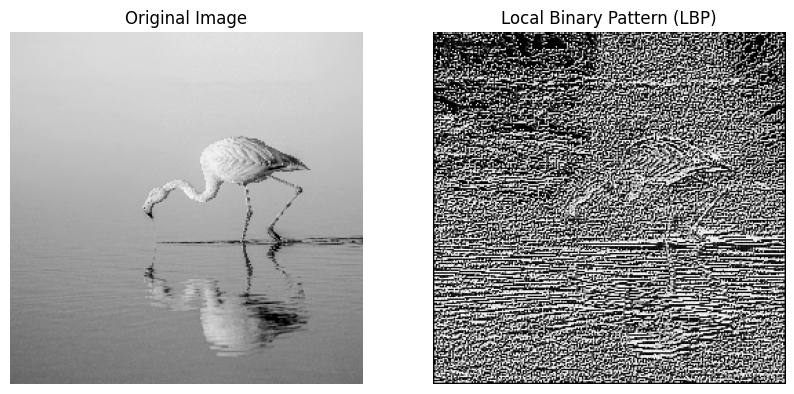

LBP applied successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (256, 256))

lbp = np.zeros_like(img, dtype=np.uint8)

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        center = img[i, j]
        binary_str = ''
        binary_str += '1' if img[i-1, j-1] > center else '0'
        binary_str += '1' if img[i-1, j]   > center else '0'
        binary_str += '1' if img[i-1, j+1] > center else '0'
        binary_str += '1' if img[i, j+1]   > center else '0'
        binary_str += '1' if img[i+1, j+1] > center else '0'
        binary_str += '1' if img[i+1, j]   > center else '0'
        binary_str += '1' if img[i+1, j-1] > center else '0'
        binary_str += '1' if img[i, j-1]   > center else '0'
        lbp[i, j] = int(binary_str, 2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(lbp, cmap='gray')
plt.title("Local Binary Pattern (LBP)")
plt.axis('off')
plt.show()
print("LBP applied successfully!")


WAP to denoise the input image corrupted by Gaussian and Speckle noise using following filters (3×3 or 5×5 window):

(a) Wiener filter (b) Median filter (c) Gaussian filter (d) Bilateral filter

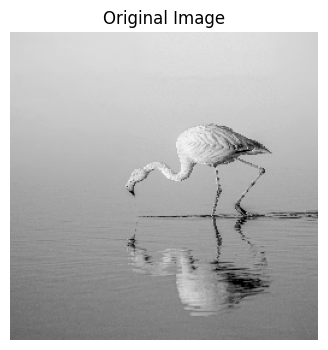

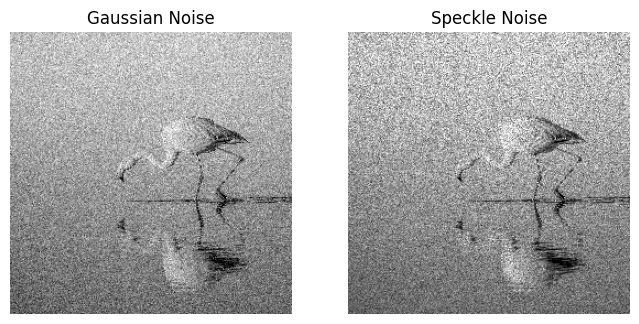

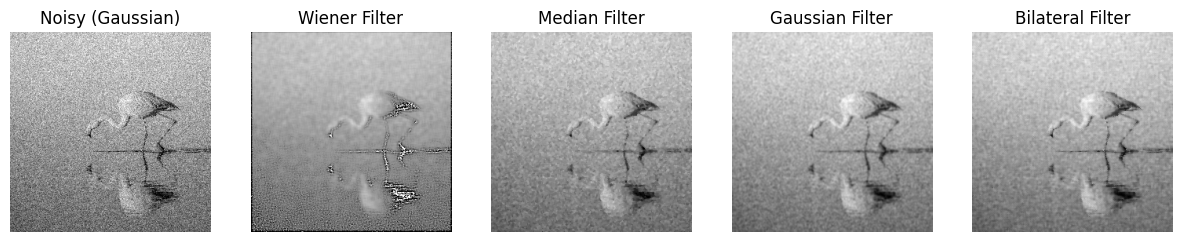

 Denoising successful! Compare which filter gives best edge preservation.


In [ ]:
# DENOISING IMAGE USING DIFFERENT FILTERS

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy.signal import wiener

img_path = "/content/image.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("⚠️ Image not found! Check filename/path.")

img = cv2.resize(img, (256, 256))

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

gaussian_noisy = random_noise(img, mode='gaussian', var=0.01)
speckle_noisy  = random_noise(img, mode='speckle', var=0.04)
gaussian_noisy = (255 * gaussian_noisy).astype(np.uint8)
speckle_noisy  = (255 * speckle_noisy).astype(np.uint8)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gaussian_noisy, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(speckle_noisy, cmap='gray')
plt.title("Speckle Noise")
plt.axis('off')
plt.show()

# (a) Wiener Filter (using scipy.signal)
wiener_filtered = wiener(gaussian_noisy, (5,5))
wiener_filtered = np.clip(wiener_filtered, 0, 255).astype(np.uint8)  # ✅ FIXED

# (b) Median Filter
median_filtered = cv2.medianBlur(gaussian_noisy, 3)

# (c) Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(gaussian_noisy, (5,5), 1)

# (d) Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(gaussian_noisy, 5, 75, 75)

titles  = ["Noisy (Gaussian)", "Wiener Filter", "Median Filter",
           "Gaussian Filter", "Bilateral Filter"]
results = [gaussian_noisy, wiener_filtered, median_filtered, gaussian_filtered, bilateral_filtered]

plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(results[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

print(" Denoising successful! Compare which filter gives best edge preservation.")


WAP to denoise the input image using adaptive median filter.
Input the initial window size and maximum size of window (Smax) from the user.
Compare the performance of median filter and adaptive median filter, using the PSNR values.


Enter initial window size: 3
Enter maximum window size: 7
Applying Adaptive Median Filter... please wait...

========= PSNR RESULTS =========
PSNR (Median Filter)         : 40.155 dB
PSNR (Adaptive Median Filter): 42.971 dB



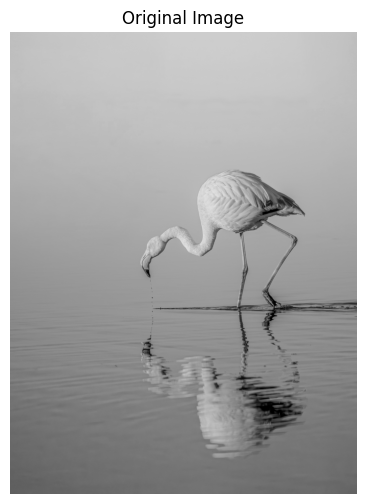

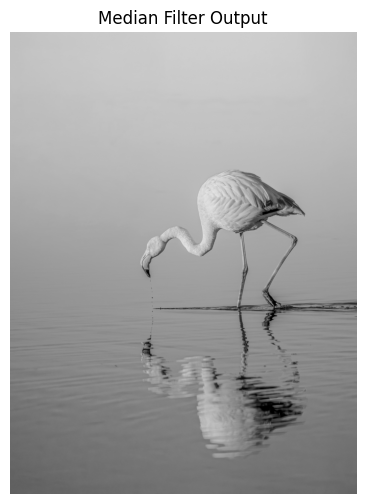

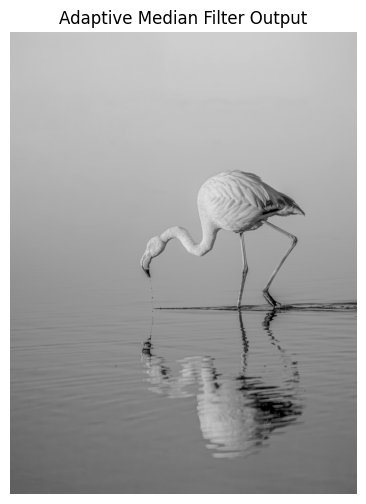

In [ ]:
# Median vs Adaptive Median Filtering

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10

# PSNR Function


def compute_psnr(img1, img2):
    """Compute PSNR between two images."""
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float("inf")
    return 10 * log10((255 * 255) / mse)


# Adaptive Median Filter

def adaptive_median_filter(img, S0, Smax):
    """
    Adaptive median filter:
    - S0: starting window size (odd)
    - Smax: maximum allowed window size
    """

    img = img.astype(np.int32)
    H, W = img.shape
    output = np.zeros_like(img)

    pad = Smax // 2
    padded = np.pad(img, pad_width=pad, mode="reflect")

    for r in range(H):
        for c in range(W):

            S = S0

            while True:

                half = S // 2
                r1, r2 = r + pad - half, r + pad + half + 1
                c1, c2 = c + pad - half, c + pad + half + 1

                window = padded[r1:r2, c1:c2]

                z_min = window.min()
                z_max = window.max()
                z_med = np.median(window)
                z_xy  = img[r, c]

                A1 = z_med - z_min
                A2 = z_med - z_max

                if A1 > 0 and A2 < 0:
                    # Stage B
                    B1 = z_xy - z_min
                    B2 = z_xy - z_max
                    if B1 > 0 and B2 < 0:
                        output[r, c] = z_xy
                    else:
                        output[r, c] = z_med
                    break

                else:
                    S += 2
                    if S > Smax:
                        output[r, c] = z_med
                        break

    return output.astype(np.uint8)



img = cv2.imread("image.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

S0 = int(input("Enter initial window size: "))
Smax = int(input("Enter maximum window size: "))

# Basic median filter
median_filtered = cv2.medianBlur(gray, S0)

# Adaptive filter may take some time
print("Applying Adaptive Median Filter... please wait...")
adaptive_filtered = adaptive_median_filter(gray, S0, Smax)

# PSNR Calculations


psnr_median   = compute_psnr(gray, median_filtered)
psnr_adaptive = compute_psnr(gray, adaptive_filtered)

print("\n========= PSNR RESULTS =========")
print(f"PSNR (Median Filter)         : {psnr_median:.3f} dB")
print(f"PSNR (Adaptive Median Filter): {psnr_adaptive:.3f} dB")
print("================================\n")


cv2.imwrite("median_output.jpg", median_filtered)
cv2.imwrite("adaptive_median_output.jpg", adaptive_filtered)


plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter Output")
plt.axis("off")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(adaptive_filtered, cmap='gray')
plt.title("Adaptive Median Filter Output")
plt.axis("off")
plt.show()


WAP to threshold the image using Otsu's global threshold
for segmentation of input gray scale image.


Otsu’s Optimal Threshold Value = 152.0


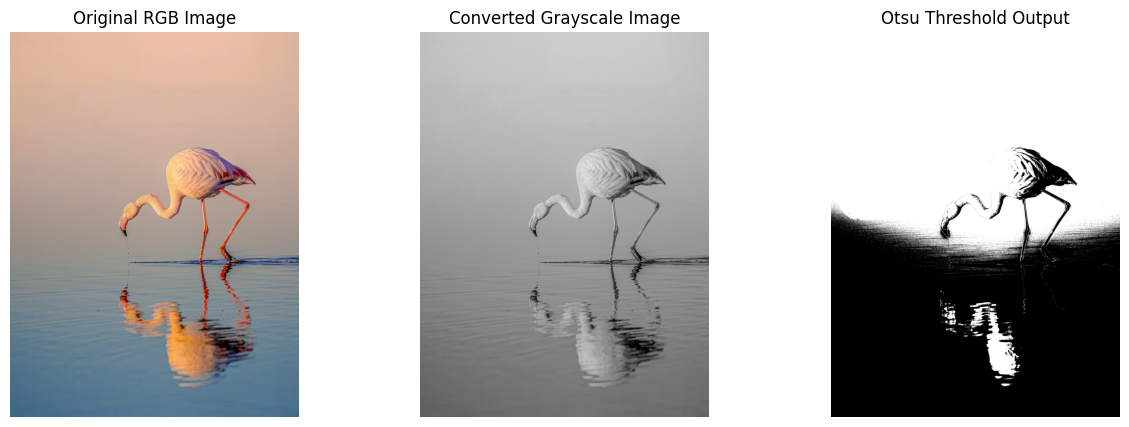

Output saved as 'otsu_output.jpg'


In [ ]:

# Otsu's Global Thresholding for Segmentation (RGB -> Gray)

import cv2
import matplotlib.pyplot as plt

rgb = cv2.imread("image.jpg")
if rgb is None:
    raise ValueError("Image not found! Upload 'image.jpg' first.")
# Convert RGB → Grayscale
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# Apply Otsu's Thresholding

# Otsu automatically chooses the best threshold
threshold_value, otsu_output = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
print("Otsu’s Optimal Threshold Value =", threshold_value)


plt.figure(figsize=(15,5))
# 1) Original RGB Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis("off")
# 2) Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Converted Grayscale Image")
plt.axis("off")
# 3) Otsu Threshold Output
plt.subplot(1, 3, 3)
plt.imshow(otsu_output, cmap='gray')
plt.title("Otsu Threshold Output")
plt.axis("off")
plt.show()

cv2.imwrite("otsu_output.jpg", otsu_output)
print("Output saved as 'otsu_output.jpg'")


WAP to use random values in confusion matrix and compute the different quantities/metrics
(Accuracy, precision, recall, F1-score, MCC) for 2 × 2 and 3 × 3 matrices.


In [ ]:
import numpy as np
# Function to compute metrics for a confusion matrix
def compute_metrics(cm):
    """
    cm : confusion matrix (numpy array)
    Supports both 2x2 and 3x3 matrices.
    """
    # Total samples
    total = np.sum(cm)

    # Accuracy (same formula for any size)
    accuracy = np.trace(cm) / total

    # For multi-class (3x3), metrics are averaged per class
    num_classes = cm.shape[0]

    precision_list = []
    recall_list = []
    f1_list = []

    for i in range(num_classes):
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP

        precision = TP / (TP + FP + 1e-10)
        recall = TP / (TP + FN + 1e-10)
        f1 = (2 * precision * recall) / (precision + recall + 1e-10)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    # Macro-averaged metrics
    precision_macro = np.mean(precision_list)
    recall_macro = np.mean(recall_list)
    f1_macro = np.mean(f1_list)
    # Matthews Correlation Coefficient (Generalized for multi-class)
    numerator = (total * np.trace(cm)) - np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
    denominator = np.sqrt(
        (total**2 - np.sum(np.sum(cm, axis=0)**2)) *
        (total**2 - np.sum(np.sum(cm, axis=1)**2))
    ) + 1e-10
    mcc = numerator / denominator

    return accuracy, precision_macro, recall_macro, f1_macro, mcc

# Generate RANDOM Confusion Matrices

# Random 2x2 matrix
cm_2x2 = np.random.randint(10, 100, size=(2, 2))

# Random 3x3 matrix
cm_3x3 = np.random.randint(10, 100, size=(3, 3))

print("Random 2x2 Confusion Matrix:")
print(cm_2x2, "\n")

print("Random 3x3 Confusion Matrix:")
print(cm_3x3, "\n")


acc2, p2, r2, f12, mcc2 = compute_metrics(cm_2x2)
acc3, p3, r3, f13, mcc3 = compute_metrics(cm_3x3)

print("===== METRICS FOR 2x2 CONFUSION MATRIX =====")
print(f"Accuracy : {acc2:.4f}")
print(f"Precision: {p2:.4f}")
print(f"Recall   : {r2:.4f}")
print(f"F1-score : {f12:.4f}")
print(f"MCC      : {mcc2:.4f}\n")

print("===== METRICS FOR 3x3 CONFUSION MATRIX =====")
print(f"Accuracy : {acc3:.4f}")
print(f"Precision: {p3:.4f}")
print(f"Recall   : {r3:.4f}")
print(f"F1-score : {f13:.4f}")
print(f"MCC      : {mcc3:.4f}")


Random 2x2 Confusion Matrix:
[[76 57]
 [95 80]] 

Random 3x3 Confusion Matrix:
[[33 32 41]
 [36 22 97]
 [30 97 27]] 

===== METRICS FOR 2x2 CONFUSION MATRIX =====
Accuracy : 0.5065
Precision: 0.5142
Recall   : 0.5143
F1-score : 0.5064
MCC      : 0.0285

===== METRICS FOR 3x3 CONFUSION MATRIX =====
Accuracy : 0.1976
Precision: 0.2142
Recall   : 0.2095
F1-score : 0.2117
MCC      : -0.2241


WAP to implement basics ingredients of CNN by taking random values in 3 × 3 matrix.

(a) Convolution and kernel

(b) Pooling (Max and Min pooling)

(c) Padding

(d) Activation function

(e) Fully connected layer

(f) Back propagation

(g) Dense layer

(h) Drop out (BN, Early stopping, L1 and L2 regularization)

(i) Fully connected layers

(j) Testing overfitting and under fitting issues


TensorFlow version: 2.19.0

=== (a) Convolution & Kernel on random 3x3 input ===
Random input (3x3):
 [[ 0.49671414 -0.1382643   0.64768857]
 [ 1.5230298  -0.23415338 -0.23413695]
 [ 1.5792128   0.7674347  -0.46947438]]
Random kernel (3x3):
 [[ 0.54256004 -0.46341768 -0.46572974]
 [ 0.24196227 -1.9132802  -1.7249179 ]
 [-0.5622875  -1.0128311   0.31424734]]
Convolution output (valid):
 -0.5604771


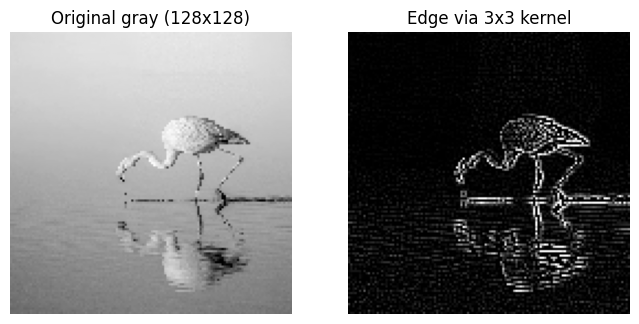


=== (b) Max and Min Pooling (on conv output) ===
Conv map shape: (1, 4, 4, 1)
Max pooled shape: (1, 2, 2, 1)
Min pooled shape: (1, 2, 2, 1)
Max pooled (squeezed):
 [[-0.05573404 -0.31719673]
 [-3.7371922   0.53300726]]
Min pooled (squeezed):
 [[-3.426372  -3.5556402]
 [-7.414503  -3.7897832]]

=== (c) Padding demonstration ===
Original 3x3:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Padded (with 1 zero border):
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]

=== (d) Activation functions (ReLU & Sigmoid) ===
Input: [[-1.  0.  1.  2.]]
ReLU: [[0. 0. 1. 2.]]
Sigmoid: [[0.26894143 0.5        0.73105854 0.880797  ]]

=== (e,g,i) Flatten -> Dense layers (stacked) demo ===
Flattened shape: (1, 8)
Dense outputs shape: (1, 2)
Dense output (softmax probs): [[0.9433214  0.05667862]]

=== (f) Backprop demo: tiny CNN model training on dummy data ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training accuracy history: [0.45 0.47 0.47 0.48 0.48 0.49 0.5  0.53 0.57 0.58]

=== (h) Regularization: Dropout, BatchNorm, L1/L2, EarlyStopping ===

Overfit model - final train acc, val acc: 1.0 0.625
Regularized model - final train acc, val acc: 0.7188 0.625


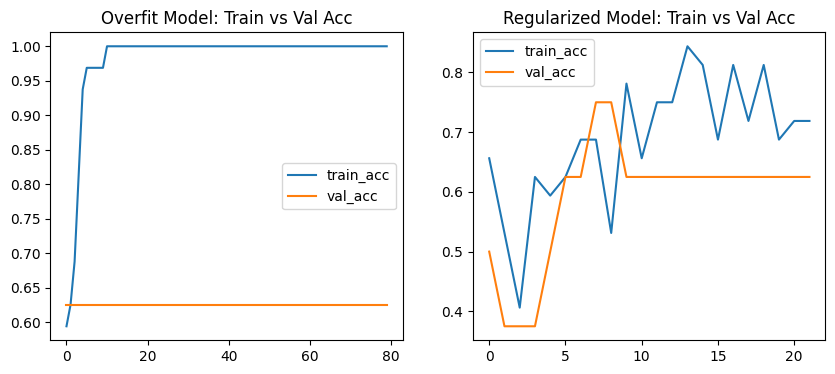


=== (j) Overfitting / Underfitting demo explained (short) ===
• Overfitting: high train acc but low val acc (see Overfit Model plot).
• Regularization (dropout, BN, L1/L2) reduces overfitting and improves val acc.
• Underfitting would show low train and low val accuracy (use smaller model or more training).

Demo finished. You can re-run sections individually to inspect arrays or change randomness.


In [ ]:
# CNN BASICS DEMO
# Uses: random 3x3 matrix + an example using image.jpg (RGB)

import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers, callbacks
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)

def show_images(images, titles=None, cmap='gray'):
    n = len(images)
    plt.figure(figsize=(4*n, 4))
    for i, img in enumerate(images):
        plt.subplot(1, n, i+1)
        if img.ndim == 2:
            plt.imshow(img, cmap=cmap)
        else:
            # image in [H,W,3] (RGB)
            plt.imshow(img)
        if titles: plt.title(titles[i])
        plt.axis('off')
    plt.show()

# (a) Convolution and kernel

print("\n=== (a) Convolution & Kernel on random 3x3 input ===")
# Random 3x3 input (single sample, 1 channel)
input_rand = np.random.randn(1, 3, 3, 1).astype(np.float32)
# Random 3x3 kernel (filter)
kernel_rand = np.random.randn(3, 3, 1, 1).astype(np.float32)

conv_out = tf.nn.conv2d(input_rand, kernel_rand, strides=[1,1,1,1], padding='VALID')
print("Random input (3x3):\n", np.squeeze(input_rand))
print("Random kernel (3x3):\n", np.squeeze(kernel_rand))
print("Convolution output (valid):\n", np.squeeze(conv_out.numpy()))

# Also demonstrate applying a simple convolution kernel to your image.jpg (RGB)
img_bgr = cv2.imread("image.jpg")
if img_bgr is None:
    print("Warning: 'image.jpg' not found in workspace. Skip image demo.")
    img_rgb = None
else:
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    # Convert to grayscale for filter demo
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    small = cv2.resize(img_gray, (128, 128))
    edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    edge_img = cv2.filter2D(small, -1, edge_kernel)
    show_images([small, edge_img], titles=["Original gray (128x128)","Edge via 3x3 kernel"])

# (b) Pooling (Max and Min)

print("\n=== (b) Max and Min Pooling (on conv output) ===")
# For pooling we need at least 2x2 region; make an example conv map larger:
big_input = np.random.randn(1, 6, 6, 1).astype(np.float32)
# simple kernel 3x3
k = np.ones((3,3,1,1), dtype=np.float32)
conv_big = tf.nn.conv2d(big_input, k, strides=[1,1,1,1], padding='VALID')
max_pooled = tf.nn.max_pool2d(conv_big, ksize=2, strides=2, padding='VALID')
# Min pooling via negative trick
min_pooled = -tf.nn.max_pool2d(-conv_big, ksize=2, strides=2, padding='VALID')

print("Conv map shape:", conv_big.shape)
print("Max pooled shape:", max_pooled.shape)
print("Min pooled shape:", min_pooled.shape)
print("Max pooled (squeezed):\n", np.squeeze(max_pooled.numpy()))
print("Min pooled (squeezed):\n", np.squeeze(min_pooled.numpy()))

# (c) Padding

print("\n=== (c) Padding demonstration ===")
sample = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]], dtype=np.float32)
sample_tf = tf.constant(sample.reshape(1,3,3,1))
padded = tf.pad(sample_tf, paddings=[[0,0],[1,1],[1,1],[0,0]], mode='CONSTANT', constant_values=0)
print("Original 3x3:\n", sample)
print("Padded (with 1 zero border):\n", np.squeeze(padded.numpy()))

# (d) Activation function

print("\n=== (d) Activation functions (ReLU & Sigmoid) ===")
x = tf.constant([[-1.0, 0.0, 1.0, 2.0]])
print("Input:", x.numpy())
print("ReLU:", tf.nn.relu(x).numpy())
print("Sigmoid:", tf.nn.sigmoid(x).numpy())


# (e),(g),(i) Fully Connected, Dense layers (stacked)

print("\n=== (e,g,i) Flatten -> Dense layers (stacked) demo ===")
# Create a fake activation map and flatten
fake_act = tf.random.normal((1,2,2,2))  # small feature map with 2 channels
flat = tf.reshape(fake_act, (1, -1))
dense1 = layers.Dense(8, activation='relu')(flat)
dense2 = layers.Dense(4, activation='relu')(dense1)
out_logits = layers.Dense(2, activation='softmax')(dense2)
print("Flattened shape:", flat.shape)
print("Dense outputs shape:", out_logits.shape)
print("Dense output (softmax probs):", out_logits.numpy())

# (f) Backprop: tiny model + training (demonstrates weight updates)

print("\n=== (f) Backprop demo: tiny CNN model training on dummy data ===")
# Create tiny dataset (toy): input vectors size 3 -> binary label
X_train = np.random.randn(100, 3).astype(np.float32)
y_train = (np.sum(X_train, axis=1) > 0).astype(np.float32)  # simple rule
y_train = y_train.reshape(-1, 1)

simple_model = models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(3,)),
    layers.Dense(1, activation='sigmoid')
])
simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h = simple_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
print("Training accuracy history:", np.round(h.history['accuracy'], 4))

# (h) Dropout, BatchNorm, L1/L2, EarlyStopping

print("\n=== (h) Regularization: Dropout, BatchNorm, L1/L2, EarlyStopping ===")
# We'll build two small models and compare training to show overfitting vs regularized

# Tiny dataset to encourage overfitting (very small)
X_small = np.random.randn(40, 10).astype(np.float32)
y_small = (np.sum(X_small, axis=1) > 0).astype(np.int32)

# Model 1: Big (likely to overfit)
model_overfit = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model_overfit.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model 2: Regularized (Dropout + BatchNorm + L2)
model_reg = models.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.005)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])
model_reg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping callback
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

# Split small dataset into train/val to visualize overfitting
split = int(0.8 * len(X_small))
X_tr, X_val = X_small[:split], X_small[split:]
y_tr, y_val = y_small[:split], y_small[split:]

h_over = model_overfit.fit(X_tr, y_tr, validation_data=(X_val,y_val),
                          epochs=80, verbose=0, batch_size=8)
h_reg = model_reg.fit(X_tr, y_tr, validation_data=(X_val,y_val),
                      epochs=80, verbose=0, batch_size=8, callbacks=[es])

# Print last few accuracies to show overfit vs reg behavior
print("\nOverfit model - final train acc, val acc:",
      round(h_over.history['accuracy'][-1],4), round(h_over.history['val_accuracy'][-1],4))
print("Regularized model - final train acc, val acc:",
      round(h_reg.history['accuracy'][-1],4), round(h_reg.history['val_accuracy'][-1],4))
# Plot training vs validation accuracy to visualize overfitting
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(h_over.history['accuracy'], label='train_acc')
plt.plot(h_over.history['val_accuracy'], label='val_acc')
plt.title("Overfit Model: Train vs Val Acc")
plt.legend()
plt.subplot(1,2,2)
plt.plot(h_reg.history['accuracy'], label='train_acc')
plt.plot(h_reg.history['val_accuracy'], label='val_acc')
plt.title("Regularized Model: Train vs Val Acc")
plt.legend()
plt.show()


# (j) Testing Overfitting/Underfitting — short summary

print("\n=== (j) Overfitting / Underfitting demo explained (short) ===")
print("• Overfitting: high train acc but low val acc (see Overfit Model plot).")
print("• Regularization (dropout, BN, L1/L2) reduces overfitting and improves val acc.")
print("• Underfitting would show low train and low val accuracy (use smaller model or more training).")


print("\nDemo finished. You can re-run sections individually to inspect arrays or change randomness.")
